In [68]:
import torch
import pandas as pd
from transformers import pipeline
torch.cuda.is_available()

True

In [69]:
# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("text-classification", 
                              model="cardiffnlp/twitter-roberta-base-sentiment-latest",
                              device=0) 

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


KeyboardInterrupt: 

In [ ]:
# Read the data from the csv file
df = pd.read_csv(r"../Data/similarity_scores.csv")

<Axes: >

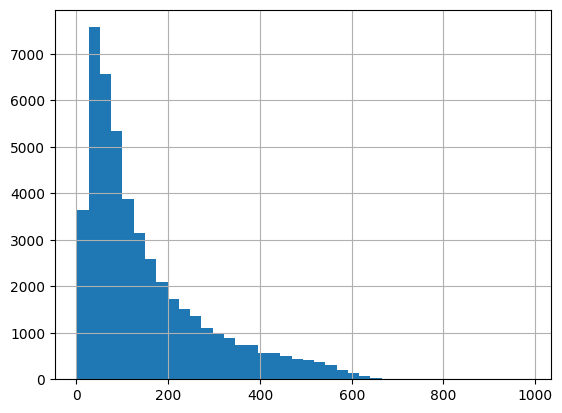

In [ ]:
# Plot a graph to see the siz of text in Cleaned Text
df["Cleaned Text"].str.len().hist(bins = 40)

# All the text in the Cleaned Text column is less than the context limit of the sentiment analysis model (512 tokens)

In [ ]:
# Calculate the sentiment of the combined text
df['Cleaned Text'] = df['Cleaned Text'].astype('str')
kwargs = {'padding':True,'truncation':True,'max_length':512}
results = sentiment_pipeline(df["Cleaned Text"].tolist(), **kwargs) 
df["label_1"] = [res["label"] for res in results]
df["score_1"] = [res["score"] for res in results]

In [ ]:
# Save the dataframe to a csv file
df.to_csv(r"../Data/labelled_data_1.csv", index=False)

## CHECK THE CONFIDENCE OF THE MODEL FOR MISLABELLED SAMPLES

In [ ]:
df = pd.read_csv(r"../Data/manual_merged.csv")

In [ ]:
df.describe()

,number_of_comments,number_of_upvotes,similarity,score_1,m_label_1
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,135.755556,145.975556,0.295253,0.736288,1.597778
std,383.262577,731.295170,0.129705,0.148578,2.083020
min,0.000000,-19.000000,0.090536,0.385341,-1.000000
25%,10.000000,2.000000,0.192450,0.609952,0.000000
50%,40.500000,7.000000,0.267261,0.758231,1.000000
75%,122.750000,44.750000,0.377964,0.870074,4.000000
max,4713.000000,8057.000000,0.707107,0.981075,4.000000


In [ ]:
df.head()

,post_id,subreddit,post_title,post_body,number_of_comments,readable_datetime,post_author,number_of_upvotes,query,text,comment_id,comment_body,comment_author,Cleaned Text,similarity,label_1,score_1,m_label_1
0,19b0b5a,OpenAI,Amazing use case: I'm a 40 year old recovering...,This list is by no means exhaustive; over the ...,92,2024-01-20 05:52:14,LifeIsMostValuable,2,coding with ChatGPT,Congrats on breaking free! I have to say I hav...,kippw31,Congrats on breaking free! I have to say I hav...,heavy-minium,congrats on breaking free i have to say i have...,0.258199,negative,0.467608,0.0
1,1icahc2,ChatGPT,Why does deepseek keep calling itself chatgpt,"well I know identity doesn’t matter,",116,2025-01-28 23:50:33,baskerville_clan,166,NaN,Why does deepseek keep calling itself chatgpt ...,NaN,NaN,NaN,why does deepseek keep calling itself chatgpt ...,0.447214,negative,0.807592,0.0
2,1ib7xft,ChatGPT,Please bro stop using the free better alternat...,NaN,860,2025-01-27 16:40:08,analgerianabroad,124,NaN,"""Faking"" low cost is literally what ChatGPT wa...",m9h65nu,"""Faking"" low cost is literally what ChatGPT wa...",Efrayl,faking low cost is literally what chatgpt was ...,0.267261,negative,0.873706,-1.0
3,11r0qx0,OpenAI,API Throttling (not rate limit),I swear to god this is happening. I've been re...,5,2023-03-14 12:33:17,DocmodApp,2,rate limit,API Throttling (not rate limit) I swear to god...,NaN,NaN,NaN,api throttling not rate limit i swear to god t...,0.152499,negative,0.820520,-1.0
4,1hgna9l,OpenAI,Google has overshadowed 12 days of open ai til...,The response open ai would have expected from ...,243,2024-12-18 02:55:27,No_Macaroon_7608,15,Sora,Google was so bad I thought did they get AI sc...,m2kzjk0,Google was so bad I thought did they get AI sc...,mike7seven,google was so bad i thought did they get ai sc...,0.134840,negative,0.880184,-1.0


In [ ]:
# Map m_label_1 to sentiment labels
df["m_label_1"] = df["m_label_1"].map({-1: "negative", 1: "positive", 0: "neutral", 4:"irrelevant"})

In [ ]:
df["m_label_1"] = df["m_label_1"].astype("O")
df["label_1"] = df["label_1"].astype("O")
df.head()

,post_id,subreddit,post_title,post_body,number_of_comments,readable_datetime,post_author,number_of_upvotes,query,text,comment_id,comment_body,comment_author,Cleaned Text,similarity,label_1,score_1,m_label_1
0,19b0b5a,OpenAI,Amazing use case: I'm a 40 year old recovering...,This list is by no means exhaustive; over the ...,92,2024-01-20 05:52:14,LifeIsMostValuable,2,coding with ChatGPT,Congrats on breaking free! I have to say I hav...,kippw31,Congrats on breaking free! I have to say I hav...,heavy-minium,congrats on breaking free i have to say i have...,0.258199,negative,0.467608,neutral
1,1icahc2,ChatGPT,Why does deepseek keep calling itself chatgpt,"well I know identity doesn’t matter,",116,2025-01-28 23:50:33,baskerville_clan,166,NaN,Why does deepseek keep calling itself chatgpt ...,NaN,NaN,NaN,why does deepseek keep calling itself chatgpt ...,0.447214,negative,0.807592,neutral
2,1ib7xft,ChatGPT,Please bro stop using the free better alternat...,NaN,860,2025-01-27 16:40:08,analgerianabroad,124,NaN,"""Faking"" low cost is literally what ChatGPT wa...",m9h65nu,"""Faking"" low cost is literally what ChatGPT wa...",Efrayl,faking low cost is literally what chatgpt was ...,0.267261,negative,0.873706,negative
3,11r0qx0,OpenAI,API Throttling (not rate limit),I swear to god this is happening. I've been re...,5,2023-03-14 12:33:17,DocmodApp,2,rate limit,API Throttling (not rate limit) I swear to god...,NaN,NaN,NaN,api throttling not rate limit i swear to god t...,0.152499,negative,0.820520,negative
4,1hgna9l,OpenAI,Google has overshadowed 12 days of open ai til...,The response open ai would have expected from ...,243,2024-12-18 02:55:27,No_Macaroon_7608,15,Sora,Google was so bad I thought did they get AI sc...,m2kzjk0,Google was so bad I thought did they get AI sc...,mike7seven,google was so bad i thought did they get ai sc...,0.134840,negative,0.880184,negative


In [ ]:
# Drop the rows where the m_label_1 is 4 (marked irrelevant)
df = df[df["m_label_1"] != "irrelevant"]

In [ ]:
df.describe()

,number_of_comments,number_of_upvotes,similarity,score_1
count,268.000000,268.000000,268.000000,268.000000
mean,150.951493,192.119403,0.287343,0.726031
std,386.466323,918.963661,0.121697,0.151392
min,0.000000,-19.000000,0.101015,0.385341
25%,11.000000,2.000000,0.191583,0.595328
50%,46.000000,7.000000,0.258199,0.747033
75%,140.500000,45.000000,0.353553,0.859085
max,3958.000000,8057.000000,0.707107,0.975497


<Axes: >

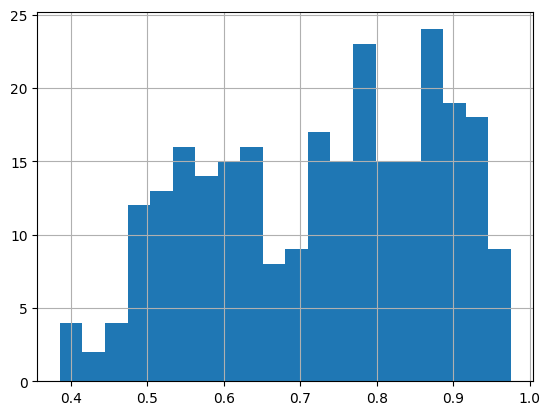

In [67]:
df["score_1"].hist(bins=20)

<Axes: >

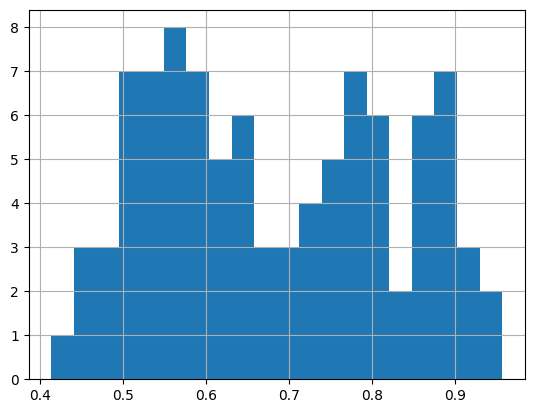

In [ ]:
# Plot a histogram of the score_1 column, for the records where the m_label_1 and label_1 are not the same
df[df["m_label_1"] != df["label_1"]]["score_1"].hist(bins=20)

<Axes: >

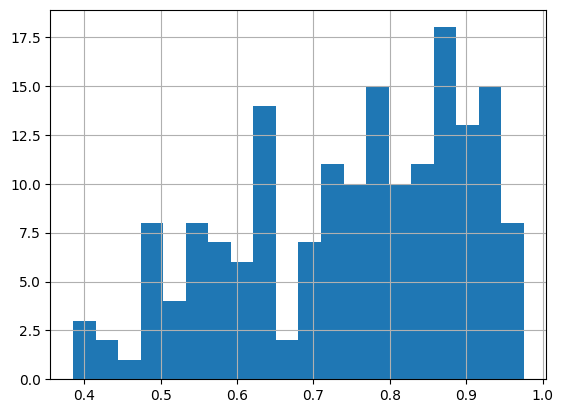

In [ ]:
df[df["m_label_1"] == df["label_1"]]["score_1"].hist(bins=20)

In [ ]:
# Average confidence score for the records where the m_label_1 and label_1 are not the same
df[df["m_label_1"] != df["label_1"]]["score_1"].mean()

np.float64(0.6843650017914019)

In [ ]:
# Average confidence score for the records where the m_label_1 and label_1 are the same
df[df["m_label_1"] == df["label_1"]]["score_1"].mean()

np.float64(0.7489106150376315)

In [74]:
df = pd.read_csv(r"../Data/labelled_data_1.csv")

In [80]:
# Find the number of samples with confidence score less than 
df[df["score_1"] < 0.5].shape[0]

2636

<Axes: >

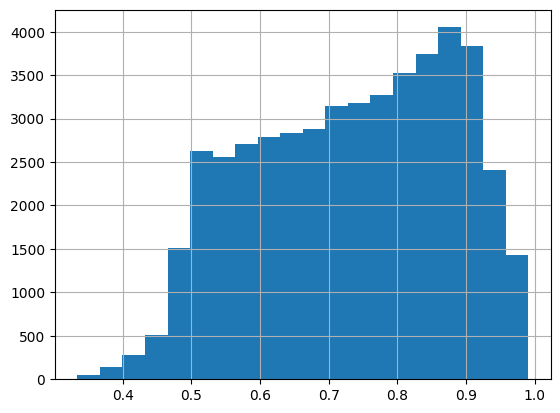

In [81]:
df["score_1"].hist(bins=20)